In [7]:
# Excercise 7-11
rm(list=ls())

In [8]:
# Part a: Initialize x1, x2, and y:
# Parms:
n <- 100
num_iter <- 1000  # For the loop
shift_x <- 5
scale_x <- 10
shift_u <- 10
scale_u <- 20
b0_true <- 1
b1_true <- 2
b2_true <- -3
# Generate x1 and x2 to be loosely correlated variables:
set.seed(1)
u1 <- runif(n)
u2 <- runif(n)
x1 <- (u1*scale_x-shift_x)
x2 <- x1+(u2*scale_u-shift_u)
# Cor should be slightly positive.
print(cor(x1,x2))
# Create y:
y <- b0_true+b1_true*x1+b2_true*x2

[1] 0.4538465


In [9]:
# Part b: Initialized b1:
b1_hat <- -1

In [10]:
# Part c: Fit model:
y_offset_x1 <- (y-b1_hat*x1)
b2_hat <- lm(y_offset_x1~x2)$coef[2]

In [11]:
# Part d: update b1:
y_offset_x2 <- (y-b2_hat*x2)
b1_hat <- lm(y_offset_x2~x1)$coef[2]

In [12]:
# Part e
# Create storage vectors for coef at the end of each iter:
b0_vec <- rep(0, num_iter)
b1_vec <- rep(0, num_iter)
b2_vec <- rep(0, num_iter)
b1_hat <- -1
# Iterate num_iter times and store coef values at end of each iter:
for (l in 1:num_iter)
{
    # Part c: Given b1_hat, update b2_hat:
    y_offset_x1 <- (y-b1_hat*x1)
    b2_hat <- lm(y_offset_x1~x2)$coef[2]
    # Part d: Given b2_hat, update b1_hat:
    y_offset_x2 <- (y-b2_hat*x2)
    b1_hat <- lm(y_offset_x2~x1)$coef[2]
    # Save values at end of iteration:
    b0_vec[l] <- lm(y_offset_x2~x1)$coef[1]
    b1_vec[l] <- b1_hat
    b2_vec[l] <- b2_hat
}

In [36]:
# Part f: Estimated from multiple linear regression:
actual_reg <- lm(y~x1+x2)
summary(actual_reg)
print(actual_reg$coef[1])
# Perfect fit is expected, as this is simulated data constructed for this purpose.

Warning message in summary.lm(actual_reg):
"essentially perfect fit: summary may be unreliable"



Call:
lm(formula = y ~ x1 + x2)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.705e-14 -2.078e-15 -9.220e-16  1.250e-16  1.049e-13 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  1.000e+00  1.168e-15  8.563e+14   <2e-16 ***
x1           2.000e+00  4.901e-16  4.080e+15   <2e-16 ***
x2          -3.000e+00  2.150e-16 -1.395e+16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.163e-14 on 97 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.005e+32 on 2 and 97 DF,  p-value: < 2.2e-16


(Intercept) 
          1 


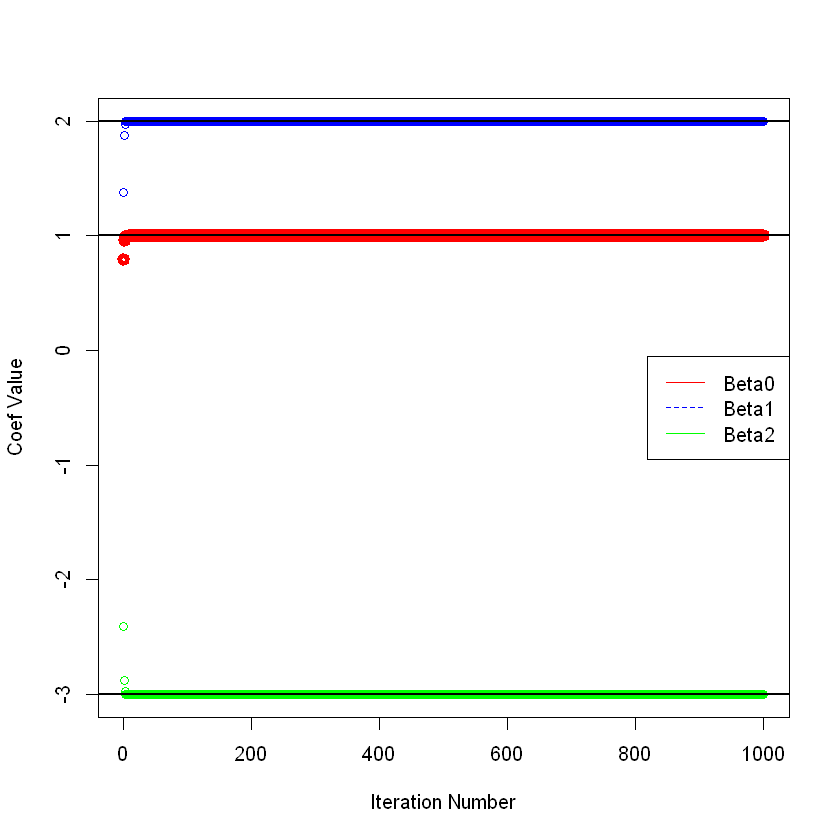

In [38]:
# Plots from part e:
plot(1:num_iter, b0_vec, col="red", lwd=4, ylim=c(-3,2), xlab="Iteration Number", ylab="Coef Value")
points(1:num_iter, b1_vec, col="blue")
points(1:num_iter, b2_vec, col="green")
legend("right", legend=c("Beta0", "Beta1", "Beta2"),
       col=c("red", "blue", "green"), lty=1:2, cex=1)
# Overlay the estimated values (in 3 black lines) from the above reg:
abline(a=actual_reg$coef[1], b=0, lwd=2)
abline(a=actual_reg$coef[2], b=0, lwd=2)
abline(a=actual_reg$coef[3], b=0, lwd=2)
# Clearly the abline's plot of the estimated multiple regression results pass right through the "steady state"
# values that each of the three parm time series values converge to. 

[1] 2
[1] 3
[1] 2


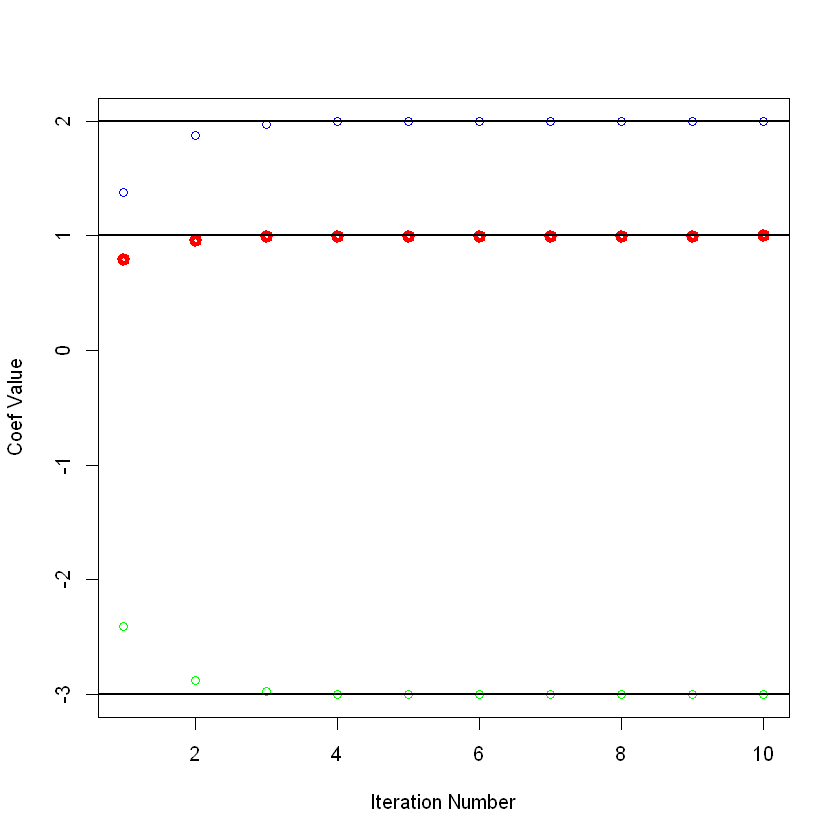

In [56]:
# Part g:
plot(1:num_iter, b0_vec, col="red", lwd=4, , xlim=c(1,10), ylim=c(-3,2), xlab="Iteration Number", ylab="Coef Value")
points(1:num_iter, b1_vec, col="blue")
points(1:num_iter, b2_vec, col="green")
abline(a=actual_reg$coef[1], b=0, lwd=2)
abline(a=actual_reg$coef[2], b=0, lwd=2)
abline(a=actual_reg$coef[3], b=0, lwd=2)
# Qualitatively, it takes about 3 iterations (=not many) to get "good" approximations.
b0_ind_vec <- ifelse(abs((b0_vec/actual_reg$coef[1]-1))<0.05, abs((b0_vec/actual_reg$coef[1]-1)), 0)
print(which.max(b0_ind_vec))
b1_ind_vec <- ifelse(abs((b1_vec/actual_reg$coef[2]-1))<0.05, abs((b1_vec/actual_reg$coef[2]-1)), 0)
print(which.max(b1_ind_vec))
b2_ind_vec <- ifelse(abs((b2_vec/actual_reg$coef[3]-1))<0.05, abs((b2_vec/actual_reg$coef[3]-1)), 0)
print(which.max(b2_ind_vec))
# Quantitatively, if we define "good approximation" as within 5% of actual, it takes (2,3,2) iterations of the 
# algorithm to get a "good approximation" of the (intercept, x1 coef, x2 coef), respectively.